# RNN预测股价实战
1、完成数据预处理，将序列数据转化为可用于RNN输入的数据  
2、对新数据zgpa_test.csv进行预测，可视化结果   
3、存储预测结果，并观察局部预测结果  
备注：模型结构：单层RNN，输出有5个神经元，每次使用前8个数据预测第9个数据  

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("zgpa_train.csv")
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data['close']
#归一化处理
price_norm = price / max(price)

Text(0, 0.5, 'price')

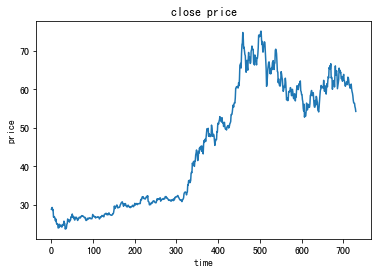

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(price, label='real price')
ax.set_title('close price')
ax.set_xlabel('time')
ax.set_ylabel('price')

In [4]:
#define X and y
#define method to extract X and y
def extract_data(data, time_step):
    X = []
    y = []
    for i in range(len(data) - time_step):
        X.append([a for a in data[i:i + time_step]])  #左开右闭
        y.append(data[i + time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y

In [5]:
time_step = 8
X, y = extract_data(price_norm, time_step)

In [7]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
#add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))
#add ouput layer
model.add(Dense(units=1, activation='linear'))
#configure the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [8]:
#training the model
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
model.fit(X, y, batch_size=30, epochs=200)


Epoch 1/200
723/723 [==============================] - 2s 2ms/step - loss: 0.4097
Epoch 2/200
723/723 [==============================] - 0s 295us/step - loss: 0.3404
Epoch 3/200
723/723 [==============================] - 0s 303us/step - loss: 0.2813
Epoch 4/200
723/723 [==============================] - 0s 408us/step - loss: 0.2284
Epoch 5/200
723/723 [==============================] - 0s 387us/step - loss: 0.1786
Epoch 6/200
723/723 [==============================] - 0s 336us/step - loss: 0.1294
Epoch 7/200
723/723 [==============================] - 0s 277us/step - loss: 0.0824
Epoch 8/200
723/723 [==============================] - 0s 291us/step - loss: 0.0469
Epoch 9/200
723/723 [==============================] - 0s 289us/step - loss: 0.0256
Epoch 10/200
723/723 [==============================] - 0s 298us/step - loss: 0.0177
Epoch 11/200
723/723 [==============================] - 0s 383us/step - loss: 0.0159
Epoch 12/200
723/723 [==============================] - 0s 355us/step - los

723/723 [==============================] - 0s 296us/step - loss: 3.1664e-04
Epoch 93/200
723/723 [==============================] - 0s 271us/step - loss: 3.1099e-04
Epoch 94/200
723/723 [==============================] - 0s 276us/step - loss: 3.1084e-04
Epoch 95/200
723/723 [==============================] - 0s 263us/step - loss: 3.0856e-04
Epoch 96/200
723/723 [==============================] - 0s 261us/step - loss: 3.0788e-04
Epoch 97/200
723/723 [==============================] - 0s 272us/step - loss: 3.1446e-04
Epoch 98/200
723/723 [==============================] - 0s 274us/step - loss: 3.0936e-04
Epoch 99/200
723/723 [==============================] - 0s 270us/step - loss: 3.0799e-04
Epoch 100/200
723/723 [==============================] - 0s 268us/step - loss: 3.1016e-04
Epoch 101/200
723/723 [==============================] - 0s 267us/step - loss: 3.1326e-04
Epoch 102/200
723/723 [==============================] - 0s 273us/step - loss: 3.0886e-04
Epoch 103/200
723/723 [========

723/723 [==============================] - 0s 277us/step - loss: 2.7770e-04
Epoch 184/200
723/723 [==============================] - 0s 268us/step - loss: 2.6887e-04
Epoch 185/200
723/723 [==============================] - 0s 270us/step - loss: 2.7305e-04
Epoch 186/200
723/723 [==============================] - 0s 271us/step - loss: 2.7312e-04
Epoch 187/200
723/723 [==============================] - 0s 274us/step - loss: 2.7106e-04
Epoch 188/200
723/723 [==============================] - 0s 272us/step - loss: 2.6890e-04
Epoch 189/200
723/723 [==============================] - 0s 271us/step - loss: 2.6868e-04
Epoch 190/200
723/723 [==============================] - 0s 271us/step - loss: 2.7049e-04
Epoch 191/200
723/723 [==============================] - 0s 267us/step - loss: 2.8586e-04
Epoch 192/200
723/723 [==============================] - 0s 269us/step - loss: 2.6653e-04
Epoch 193/200
723/723 [==============================] - 0s 264us/step - loss: 2.7258e-04
Epoch 194/200
723/723 [=

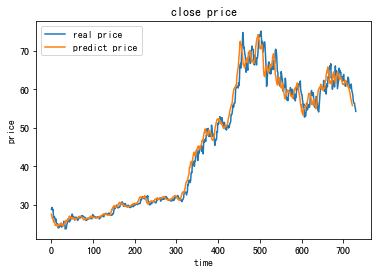

In [15]:
#make prediction based on the training data
y_train_predict = model.predict(X) * max(price)
ax.plot(y_train_predict, label='predict price')
ax.legend()
fig

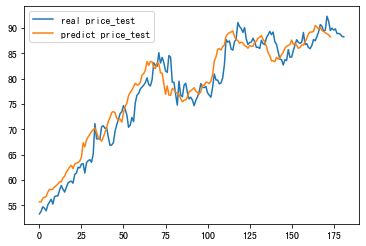

In [21]:
#make prediction based on the test data
data_test = pd.read_csv('zgpa_test.csv')
price_test = data_test['close']
price_test_norm = price_test / max(price_test)
X_test, y_test = extract_data(price_test_norm, time_step)
y_test_predict = model.predict(X_test) * max(price_test)

fig2 = plt.figure()
plt.plot(price_test, label='real price_test')
plt.plot(y_test_predict, label='predict price_test')
plt.legend()

RNN预测股价实战summary:
1、通过搭建RNN模型，实现了基于历史数据对次日股价的预测  
2、熟悉了RNN模型的数据格式结构  
3、掌握了数字序列的数据预处理方法  
4、实现了预测数据存储，通过可视化局部细节了解了RNN用于股价预测的局限性：信息延迟